    Homework solution:    HW02_EDA
                   By:    K Dehnad

In [ ]:
# pip install pandas-profiling

In [ ]:
# pip install pydantic-settings

In [ ]:
# pip install ydata-profiling
from ydata_profiling import ProfileReport

1-Load the “breast-cancer-wisconsin.data.csv” from canvas into R/python and perform the EDA analysis by:
I. Summarizing each column (e.g. min, max, mean )
II. Identifying missing values 
III. Replacing the missing values with the “mean” of the column. 
IV. Displaying the frequency table of “Class” vs. F6
V.Displaying the scatter plot of F1 to F6, one pair at a time
VI. Show histogram box plot for columns F7 to F9 2- Delete all the objects from your R/python- environment.
Reload the “breast-cancer-wisconsin.data.csv” from canvas into R. Remove any row with a missing value in any of the columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
# from pandas_profiling import ProfileReport #this is not working have to fix it.

In [3]:
# Load the data into a pandas dataframe

# df = pd.read_csv('your_data.csv', dtype={'column_name1': 'int64', 'column_name2': 'float64', 'column_name3': 'str'})
#df = pd.read_csv('your_data.csv', dtype=dtypes)
df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris_missing.csv')

print(df.describe())
df.head()



       SepalLength  SepalWidth  PetalWidth
count   150.000000  150.000000  150.000000
mean     58.433333   30.573333   11.993333
std       8.280661    4.358663    7.622377
min      43.000000   20.000000    1.000000
25%      51.000000   28.000000    3.000000
50%      58.000000   30.000000   13.000000
75%      64.000000   33.000000   18.000000
max      79.000000   44.000000   25.000000


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,50,33,14,2,Setosa
1,46,34,,3,Setosa
2,46,36,10,2,Setosa
3,51,33,17,5,Setosa
4,55,35,13,2,Setosa


In [4]:

## change the column type


df['Species']=df['Species'].astype('category')
df['PetalLength'] = pd.to_numeric(df['PetalLength'], errors='coerce') ## coerce the ? to missing

# Compute the minimum, maximum, and mean of each numeric column

# Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)



       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   147.000000  150.000000
mean     58.433333   30.573333    38.054422   11.993333
std       8.280661    4.358663    17.512728    7.622377
min      43.000000   20.000000    10.000000    1.000000
25%      51.000000   28.000000    16.000000    3.000000
50%      58.000000   30.000000    44.000000   13.000000
75%      64.000000   33.000000    51.000000   18.000000
max      79.000000   44.000000    69.000000   25.000000

 min, max, mean only
      SepalLength  SepalWidth  PetalLength  PetalWidth
min     43.000000   20.000000    10.000000    1.000000
max     79.000000   44.000000    69.000000   25.000000
mean    58.433333   30.573333    38.054422   11.993333


In [ ]:

profile = ProfileReport(df, title="Profiling data frame")
profile

In [5]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

    SepalLength  SepalWidth  PetalLength  PetalWidth Species
1            46          34          NaN           3  Setosa
28           55          42          NaN           2  Setosa
38           54          37          NaN           2  Setosa
SepalLength    0
SepalWidth     0
PetalLength    3
PetalWidth     0
Species        0
dtype: int64


In [6]:


# # # Replace missing values with the mean of the column
df['PetalLength'].fillna(df['PetalLength'].mean(),inplace=True)

# df.fillna(df.mean(), inplace=True)
print("\n check for missing value again")
print(df.isnull().sum())



 check for missing value again
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64


In [7]:
#IV.	Displaying the frequency table of “PetalLength” vs. Species
freq_table = pd.crosstab(df['PetalLength'], df['Species'])
print(freq_table)

Species      Setosa  Versicolor  Virginica
PetalLength                               
10.000000         1           0          0
11.000000         1           0          0
12.000000         2           0          0
13.000000         7           0          0
14.000000        11           0          0
15.000000        12           0          0
16.000000         7           0          0
17.000000         4           0          0
19.000000         2           0          0
30.000000         0           1          0
33.000000         0           2          0
35.000000         0           2          0
36.000000         0           1          0
37.000000         0           1          0
38.000000         0           1          0
38.054422         3           0          0
39.000000         0           3          0
40.000000         0           5          0
41.000000         0           3          0
42.000000         0           4          0
43.000000         0           2          0
44.000000  

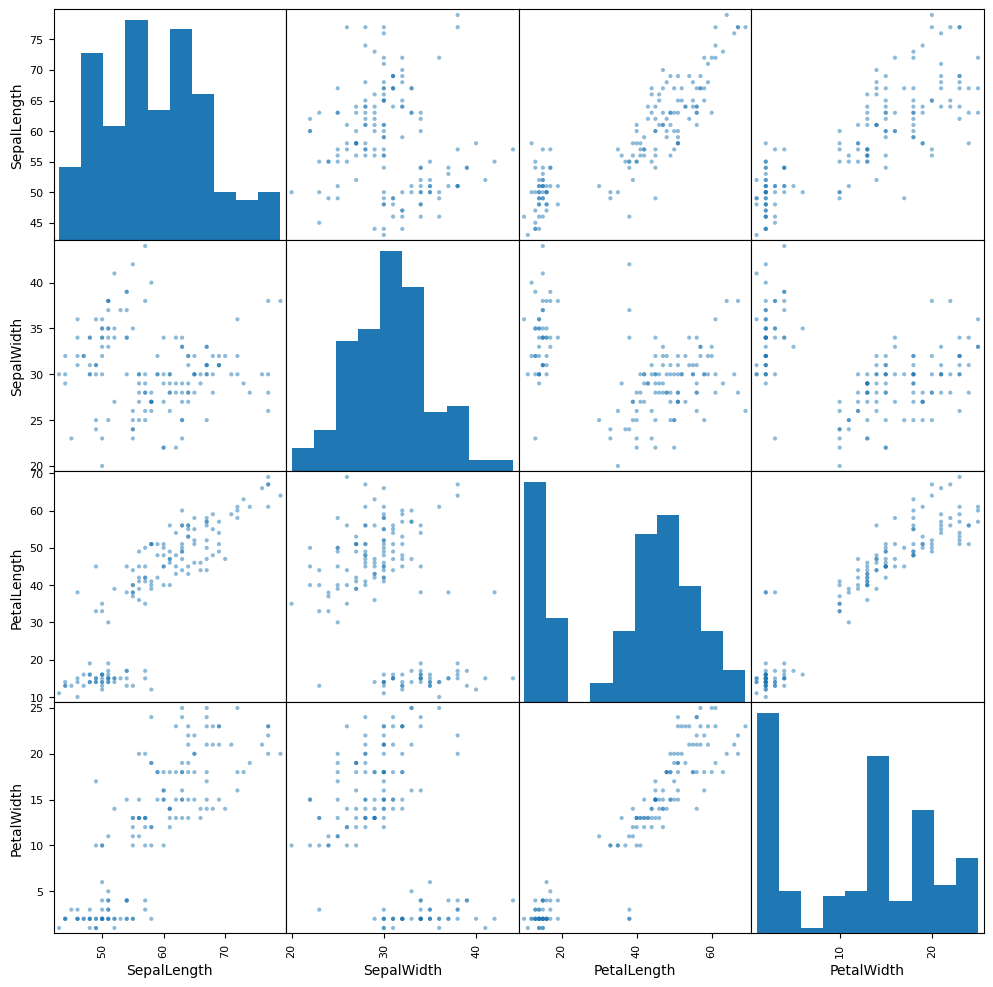

In [8]:
# # Displaying the scatter plot of  	SepalLength	SepalWidth	PetalLength	PetalWidth	Species, one pair at a time
# # Create scatter plot matrix
pd.plotting.scatter_matrix(df.loc[:, 'SepalLength':'PetalWidth'], figsize=(12,12), diagonal='hist')

# Show plot
plt.show()

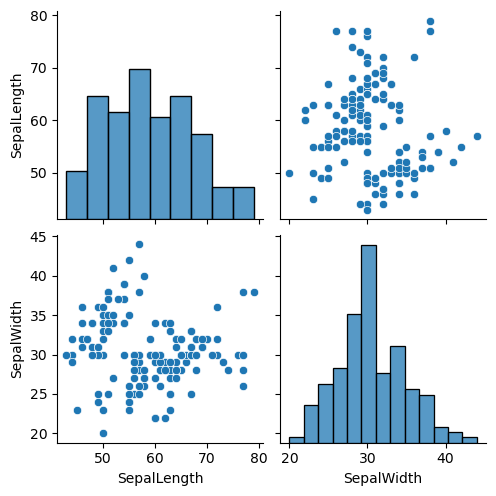

In [9]:
import seaborn as sns
sns.pairplot(df.loc[:, 'SepalLength':'SepalWidth'])

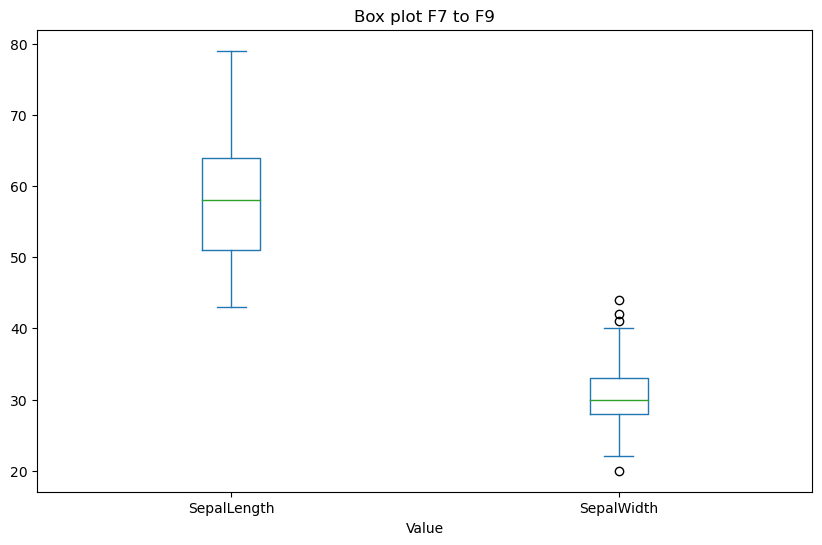

In [10]:
# Create a box plot
subset=df.loc[:, 'SepalLength':'SepalWidth']
subset.plot(kind="box", vert=True, figsize=(10, 6))
plt.title("Box plot F7 to F9", fontsize=12)
plt.xlabel("Value")
plt.show()

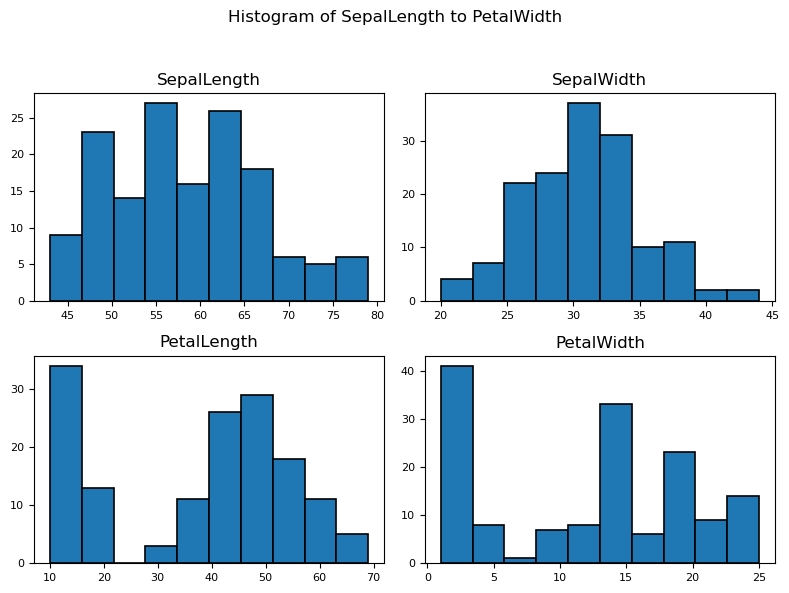

In [11]:
# Select columns F7 to F9
subset = df.loc[:, 'SepalLength':'PetalWidth']

# Create a histogram
subset.hist(grid=False, bins=10, edgecolor="black", linewidth=1.2, xlabelsize=8, ylabelsize=8, figsize=(8, 6))
plt.suptitle("Histogram of SepalLength to PetalWidth", fontsize=12)
plt.tight_layout(rect=(0,0,1,0.95))
plt.show()


In [13]:

#Reload the “iris_missing.csv” 
#Remove any row with a missing value in any of the columns.
filename='C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris_missing.csv'
nan_values=['?']
att_type={' Sample': 'str' }

df=pd.read_csv(filename,dtype=att_type,na_values=nan_values)

# df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/iris_missing.csv.csv')
print(df.shape)
print(df.isnull().sum())
print()
df.dropna(inplace=True)
print(f"shape : {df.shape}")
print(df.isnull().sum())
# print(df.describe())
# df.head()


(150, 5)
SepalLength    0
SepalWidth     0
PetalLength    2
PetalWidth     0
Species        0
dtype: int64

shape : (148, 5)
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64
